<center>
<h1> Insaurance Claims Case Study <h1>
</center>

### 1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [217]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
import scipy.stats as stats

In [218]:
claims=pd.read_csv('claims.csv')
cust_data=pd.read_csv('cust_demographics.csv')

In [219]:
claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


In [220]:
cust_data.head()


,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


In [221]:
claims.customer_id.nunique(),cust_data.CUST_ID.nunique()     

(1093, 1085)

In [222]:
cust_claims=pd.merge(left=claims, right=cust_data, left_on='customer_id', right_on='CUST_ID', how='inner')
                                                # or we can also use:
#cust_claims=claims.merge(cust_data, left_on='customer_id', right_on='CUST_ID', how='left')

cust_claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No,19269962,Male,13-May-77,NV,956-871-8691,Gold


### 2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.

In [223]:
cust_claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1085 non-null   int64  
 1   customer_id          1085 non-null   int64  
 2   incident_cause       1085 non-null   object 
 3   claim_date           1085 non-null   object 
 4   claim_area           1085 non-null   object 
 5   police_report        1085 non-null   object 
 6   claim_type           1085 non-null   object 
 7   claim_amount         1020 non-null   object 
 8   total_policy_claims  1075 non-null   float64
 9   fraudulent           1085 non-null   object 
 10  CUST_ID              1085 non-null   int64  
 11  gender               1085 non-null   object 
 12  DateOfBirth          1085 non-null   object 
 13  State                1085 non-null   object 
 14  Contact              1085 non-null   object 
 15  Segment              1085 non-null   o

In [224]:
cust_claims['claim_date']=pd.to_datetime(cust_claims['claim_date'],format='mixed')
cust_claims['DateOfBirth']=pd.to_datetime(cust_claims['DateOfBirth'],format='mixed')

### 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign

In [225]:
#cust_claims['claim_amount']= cust_claims['claim_amount'].str.replace('$','').astype('float64')
                                #or 
cust_claims['claim_amount']=cust_claims['claim_amount'].str.lstrip('$').astype('float64')

In [226]:
cust_claims.dtypes

claim_id                        int64
customer_id                     int64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                  float64
total_policy_claims           float64
fraudulent                     object
CUST_ID                         int64
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                        object
Segment                        object
dtype: object

### 4.Check for missing values and impute the missing values with an appropriate value. 

In [227]:
cust_claims.isna().sum()/cust_claims.shape[0]

claim_id               0.000000
customer_id            0.000000
incident_cause         0.000000
claim_date             0.000000
claim_area             0.000000
police_report          0.000000
claim_type             0.000000
claim_amount           0.059908
total_policy_claims    0.009217
fraudulent             0.000000
CUST_ID                0.000000
gender                 0.000000
DateOfBirth            0.000000
State                  0.000000
Contact                0.000000
Segment                0.000000
dtype: float64

In [228]:
cust_claims[cust_claims[['claim_amount','total_policy_claims']].isna().any(axis=1)]

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
20,32630720,75584003,Crime,2017-02-03,Auto,No,Material only,NaN,1.0,No,75584003,Female,2067-04-22,OK,723-418-3248,Silver
22,46956597,10665308,Natural causes,2018-07-20,Auto,No,Material only,NaN,1.0,No,10665308,Male,1999-06-21,CT,324-971-8395,Silver
29,18210740,80379865,Natural causes,2018-02-09,Auto,No,Injury only,18580.0,NaN,No,80379865,Male,2069-02-27,NM,427-513-8479,Gold
47,28636278,31012778,Other causes,2018-03-01,Auto,No,Material only,NaN,5.0,Yes,31012778,Female,1993-06-09,MA,328-683-8359,Gold
48,96749077,84571128,Natural causes,2017-05-15,Auto,No,Material only,NaN,1.0,Yes,84571128,Female,1995-08-16,ME,946-639-5932,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,12612736,74787956,Driver error,2017-09-14,Auto,Unknown,Material only,NaN,1.0,No,74787956,Male,1989-06-19,TX,679-514-5894,Gold
1025,54291209,28528424,Other causes,2018-07-14,Auto,No,Material only,NaN,1.0,No,28528424,Female,2060-03-02,ND,592-738-9582,Platinum
1036,83884815,71676845,Other driver error,2018-07-27,Auto,No,Material only,NaN,3.0,No,71676845,Male,1994-04-07,IN,549-982-1984,Silver
1042,24082779,74207825,Other driver error,2018-04-24,Home,No,Material only,2380.0,NaN,No,74207825,Female,2065-03-15,MI,173-637-9613,Platinum


In [229]:
# code that give error is :-
# cust_claims['total_policy_claims'].fillna(cust_claims['total_policy_claims'].mode(),inplace=True) 
# why it is giving error because:
            #The mode() function returns a Series, not a single value, because there may be multiple modes in the data.
                #You need to access the first mode explicitly using .iloc[0] or handle multiple modes appropriately.


In [230]:
cust_claims['claim_amount']= cust_claims['claim_amount'].fillna(value=cust_claims['claim_amount'].mean() )
cust_claims['total_policy_claims']= cust_claims['total_policy_claims'].fillna(value=cust_claims['total_policy_claims'].mode()[0] )

In [231]:
cust_claims.isna().sum()

claim_id               0
customer_id            0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
CUST_ID                0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
dtype: int64

In [232]:
cust_claims.nunique()

claim_id               1085
customer_id            1078
incident_cause            5
claim_date              100
claim_area                2
police_report             3
claim_type                3
claim_amount            677
total_policy_claims       8
fraudulent                2
CUST_ID                1078
gender                    2
DateOfBirth            1078
State                    50
Contact                1078
Segment                   3
dtype: int64

In [233]:
cust_claims.total_policy_claims.value_counts()

total_policy_claims
1.0    795
2.0    105
3.0     86
4.0     59
5.0     27
6.0     10
7.0      2
8.0      1
Name: count, dtype: int64

In [234]:
cust_claims.claim_type.unique()

array(['Material only', 'Injury only', 'Material and injury'],
      dtype=object)

In [235]:
cust_claims['police_report'].unique()

array(['No', 'Unknown', 'Yes'], dtype=object)

### 5. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [236]:
cust_claims['injury_unreported_flag'] = np.where( (cust_claims['claim_type'].isin( ['Injury only', 'Material and injury'])) & 
                                              (cust_claims['police_report'] != 'Yes'), 1,0)         
cust_claims.head(10)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,injury_unreported_flag
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,0
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,2070-01-13,ME,265-543-1264,Silver,0
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357,Female,1984-03-11,TN,798-631-4758,Silver,0
3,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,47830476,Female,1986-05-01,MA,413-187-7945,Silver,0
4,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,19269962,Male,1977-05-13,NV,956-871-8691,Gold,0
5,24050443,21831191,Other driver error,2017-10-04,Auto,No,Injury only,38306.5,3.0,Yes,21831191,Male,1977-05-17,NH,419-712-8513,Gold,1
6,12878692,18401412,Driver error,2018-01-13,Auto,No,Material only,1730.0,4.0,No,18401412,Male,1999-03-02,AR,752-398-2914,Gold,0
7,27026412,73486606,Natural causes,2018-04-10,Auto,No,Material only,1160.0,3.0,No,73486606,Male,1999-10-25,AK,256-968-9172,Silver,0
8,43908336,32813689,Crime,2018-02-15,Auto,Unknown,Material only,2620.0,1.0,No,32813689,Male,1993-10-12,ID,142-324-7481,Silver,0
9,63246959,33507197,Crime,2017-07-22,Auto,No,Material only,2748.5,2.0,Yes,33507197,Female,2066-09-09,RI,165-519-4583,Gold,0


In [237]:
cust_claims.customer_id.duplicated().sum(),cust_claims.CUST_ID.duplicated().sum()

(7, 7)

In [238]:
duplicate_ids=cust_claims.loc[cust_claims.customer_id.duplicated()==True,'customer_id'] 
duplicate_ids.values

array([84147585, 85357756, 53539195, 30308357, 47830476, 19269962,
       21831191], dtype=int64)

In [239]:
#check for duplicated data based on customer_id

cust_claims.loc[cust_claims.customer_id.isin([84147585, 85357756, 53539195, 30308357, 47830476, 19269962,
       21831191])].sort_values(by=['customer_id','claim_date']) 
 

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,injury_unreported_flag
4,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,19269962,Male,1977-05-13,NV,956-871-8691,Gold,0
631,39219616,19269962,Other causes,2018-09-26,Auto,No,Material only,2240.0,2.0,No,19269962,Male,1977-05-13,NV,956-871-8691,Gold,0
5,24050443,21831191,Other driver error,2017-10-04,Auto,No,Injury only,38306.5,3.0,Yes,21831191,Male,1977-05-17,NH,419-712-8513,Gold,1
632,91475471,21831191,Driver error,2018-02-09,Auto,Unknown,Material and injury,36810.0,1.0,No,21831191,Male,1977-05-17,NH,419-712-8513,Gold,1
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357,Female,1984-03-11,TN,798-631-4758,Silver,0
629,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,30308357,Female,1984-03-11,TN,798-631-4758,Silver,0
630,91609100,47830476,Natural causes,2017-04-12,Auto,Unknown,Material only,1440.0,1.0,No,47830476,Female,1986-05-01,MA,413-187-7945,Silver,0
3,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,47830476,Female,1986-05-01,MA,413-187-7945,Silver,0
605,2432399,53539195,Other causes,2017-12-24,Home,No,Material only,2480.0,1.0,No,53539195,Male,1989-10-02,NV,914-342-8239,Gold,0
622,41779510,53539195,Driver error,2018-10-03,Home,No,Injury only,25040.0,1.0,No,53539195,Male,1989-10-02,NV,914-342-8239,Gold,1


### 6. One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique. Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.

In [240]:
cust_claims.sort_values(by=['customer_id','claim_date'],inplace=True,ignore_index=True)
cust_claims.head(3)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,injury_unreported_flag
0,69348631,154557,Driver error,2018-04-10,Auto,No,Injury only,12467.681373,1.0,Yes,154557,Female,1978-05-23,DE,962-879-1238,Platinum,1
1,40953049,263204,Other causes,2018-04-04,Auto,No,Material and injury,39192.000000,1.0,Yes,263204,Male,2072-12-20,TX,173-892-6314,Silver,1
2,45780237,287476,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.500000,2.0,Yes,287476,Male,1988-07-28,FL,364-598-1549,Silver,0


In [241]:
# to retain the most recent customers and remove the duplicates
cust_claims.drop_duplicates(subset=['customer_id'],keep='last',inplace=True)
cust_claims.head(3)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,injury_unreported_flag
0,69348631,154557,Driver error,2018-04-10,Auto,No,Injury only,12467.681373,1.0,Yes,154557,Female,1978-05-23,DE,962-879-1238,Platinum,1
1,40953049,263204,Other causes,2018-04-04,Auto,No,Material and injury,39192.000000,1.0,Yes,263204,Male,2072-12-20,TX,173-892-6314,Silver,1
2,45780237,287476,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.500000,2.0,Yes,287476,Male,1988-07-28,FL,364-598-1549,Silver,0


In [242]:
cust_claims.duplicated().sum()

0

In [243]:
cust_claims.shape

(1078, 17)

In [244]:
cust_claims.claim_date.dt.year.unique()

array([2018, 2017])

### 7. Calculate the age of customers in years. Based on the age, categorize the customers 

In [245]:
print(sorted(cust_claims.DateOfBirth.dt.year.unique()))  #here some years and anomalies in the data

[1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071, 2072, 2073, 2074]


In [246]:
cust_claims['DateOfBirth'] = np.where(cust_claims['DateOfBirth'].dt.year > 2000,cust_claims['DateOfBirth'] - pd.DateOffset(years=100),cust_claims['DateOfBirth'])

In [247]:
print(sorted(cust_claims.DateOfBirth.dt.year.unique()))   

[1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999]


In [248]:
cust_claims['Age']=cust_claims.claim_date.dt.year-cust_claims.DateOfBirth.dt.year
cust_claims.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,injury_unreported_flag,Age
0,69348631,154557,Driver error,2018-04-10,Auto,No,Injury only,12467.681373,1.0,Yes,154557,Female,1978-05-23,DE,962-879-1238,Platinum,1,40
1,40953049,263204,Other causes,2018-04-04,Auto,No,Material and injury,39192.000000,1.0,Yes,263204,Male,1972-12-20,TX,173-892-6314,Silver,1,46


In [249]:
cust_claims.Age.unique()

array([40, 46, 29, 47, 38, 24, 41, 20, 55, 58, 37, 22, 52, 31, 51, 36, 19,
       34, 27, 33, 18, 23, 35, 30, 42, 39, 54, 26, 45, 28, 53, 25, 48, 44,
       50, 49, 57, 56, 43, 21, 32])

In [250]:
cust_claims['cust_category']=pd.cut(cust_claims['Age'],bins=[0,18,30,60,80],labels=['Childern','Youth','Adult','Senior'])
cust_claims.head(3)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,injury_unreported_flag,Age,cust_category
0,69348631,154557,Driver error,2018-04-10,Auto,No,Injury only,12467.681373,1.0,Yes,154557,Female,1978-05-23,DE,962-879-1238,Platinum,1,40,Adult
1,40953049,263204,Other causes,2018-04-04,Auto,No,Material and injury,39192.000000,1.0,Yes,263204,Male,1972-12-20,TX,173-892-6314,Silver,1,46,Adult
2,45780237,287476,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.500000,2.0,Yes,287476,Male,1988-07-28,FL,364-598-1549,Silver,0,29,Youth


### 8. What is the average amount claimed by the customers from various segments?

In [251]:
avg_claimed_amt=round(cust_claims.groupby('Segment').claim_amount.mean(),2)
avg_claimed_amt

Segment
Gold        12844.38
Platinum    12370.24
Silver      12265.10
Name: claim_amount, dtype: float64

### 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018

In [252]:
last_date=pd.to_datetime('2018-10-01')
prior_date=last_date-pd.DateOffset(days=20)
total_claim = cust_claims[ (cust_claims['claim_date']<=last_date) & (cust_claims['claim_date']>=prior_date)]
total_claim.groupby('incident_cause').claim_amount.sum()

incident_cause
Crime                   6840.000000
Driver error           14597.681373
Natural causes          8418.000000
Other causes          247223.681373
Other driver error     47599.500000
Name: claim_amount, dtype: float64

In [253]:
cust_claims.incident_cause.unique()

array(['Driver error', 'Other causes', 'Natural causes',
       'Other driver error', 'Crime'], dtype=object)

### 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes? 

In [254]:
cust_claims.loc[(cust_claims['State'].isin(['TX', 'DE', 'AK'])) &  (cust_claims['cust_category']=='Adult') & 
                                                                    (cust_claims['incident_cause'].str.contains('river')),'State'].value_counts()

State
DE    9
AK    8
TX    6
Name: count, dtype: int64

### 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

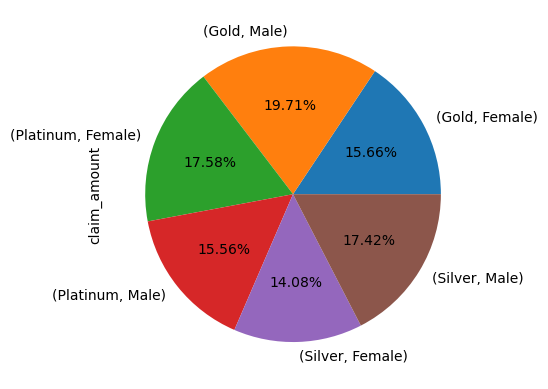

In [255]:
#segment_claims=pd.crosstab(index=cust_claims.gender,columns=cust_claims.Segment,values=cust_claims.claim_amount,aggfunc='sum') 
segment_claims = cust_claims.groupby(['Segment', 'gender'])['claim_amount'].sum() 
segment_claims.plot(kind='pie',autopct='%.2f%%')
plt.show()

### 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

In [256]:
gender_claims=cust_claims.loc[cust_claims['incident_cause'].str.contains('river'),'gender'].value_counts() 
gender_claims

gender
Male      281
Female    221
Name: count, dtype: int64

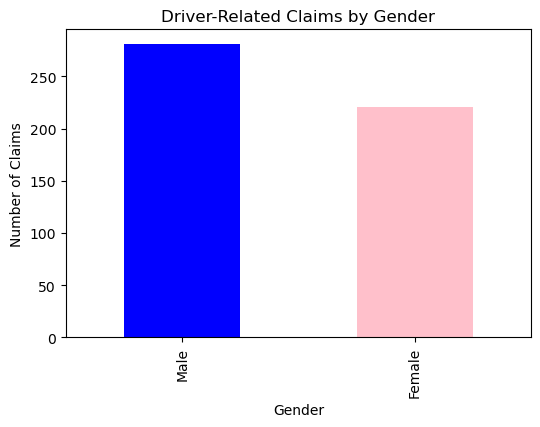

In [257]:
plt.figure(figsize=(6,4))
gender_claims.plot(kind="bar", color=["blue", "pink"])
plt.xlabel("Gender")
plt.ylabel("Number of Claims")
plt.title("Driver-Related Claims by Gender")
plt.show()

### 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

'max fraudulent claims counts'

171

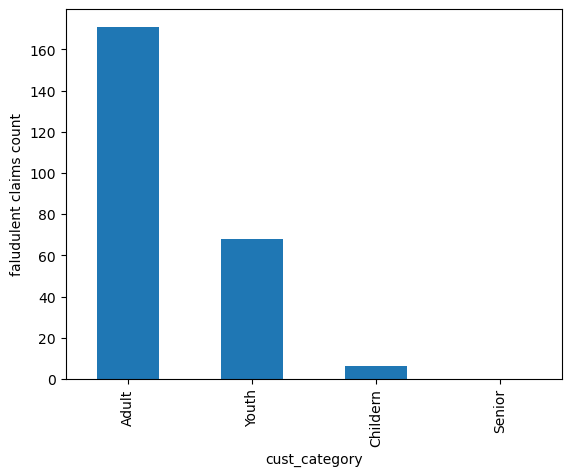

In [258]:
fraudulent_claims_count=cust_claims.loc[cust_claims['fraudulent']=='Yes','cust_category'].value_counts()
display('max fraudulent claims counts',fraudulent_claims_count.max())
fraudulent_claims_count.plot(kind='bar')
plt.ylabel('faludulent claims count')
plt.show()

### 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.   
 

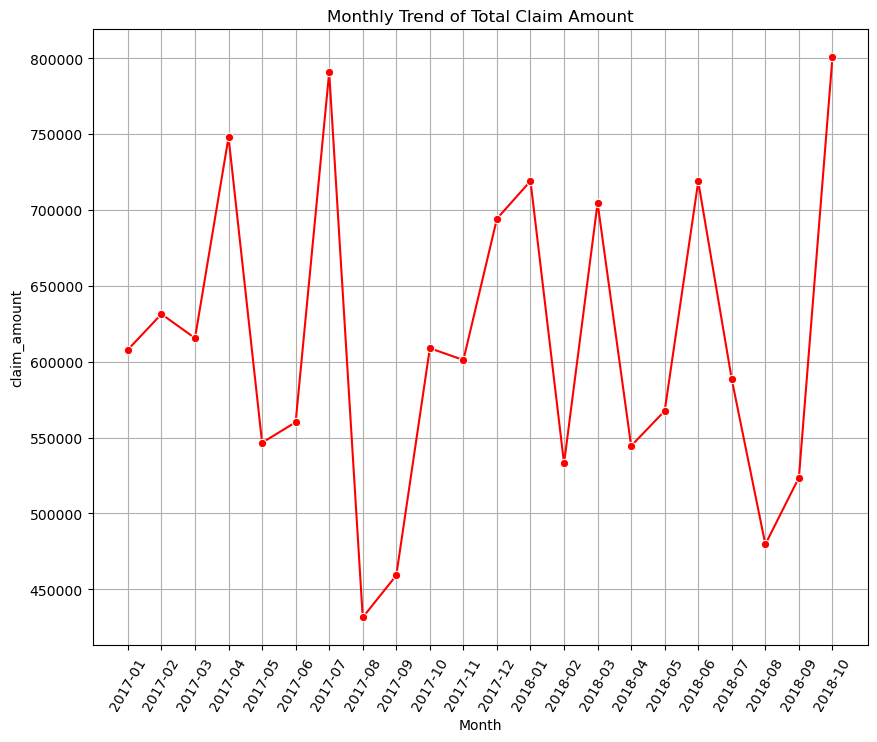

In [259]:
data=cust_claims.groupby(cust_claims.claim_date.dt.to_period('M')).claim_amount.sum().round(2).reset_index()
data.rename(columns={'claim_date':'Month'},inplace=True)
data['Month'] = data['Month'].astype(str)   #convert 'Month' to string for better axis labels
plt.figure(figsize=(10,8))
sns.lineplot(data=data, x='Month', y='claim_amount',marker='o', color='r')
plt.title("Monthly Trend of Total Claim Amount")
plt.xticks(rotation=60)
plt.grid(True)
plt.show()

### 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

In [260]:
graph=pd.crosstab(index=[cust_claims['cust_category'], cust_claims['fraudulent']],columns=cust_claims.gender,values=cust_claims.claim_amount,aggfunc='mean')
graph

gender                          Female          Male
cust_category fraudulent                            
Childern      No          10900.000000  20300.000000
              Yes          3277.500000   8045.400000
Youth         No          12494.950428  11798.034578
              Yes          7722.277871  11083.016488
Adult         No          12374.103922  12349.379743
              Yes         12564.057171  16802.984457

##### Facetplot:
    FacetGrid is a powerful function in Seaborn that allows you to create multiple plots (facets) based on categorical variables. It is useful when we want to visualize relationships across different subsets of your data.
    
    Facets (Subplots): The grid divides the data into separate subsets based on one or more categorical variables.

    We can map different Seaborn functions (e.g., sns.barplot, sns.scatterplot, sns.histplot, etc.) onto the grid.

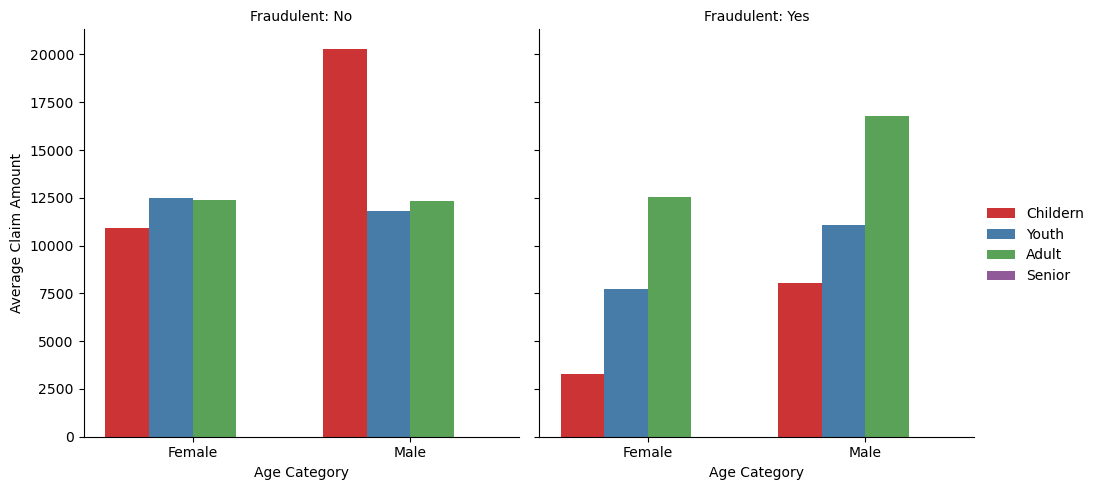

In [261]:
grouped_data = cust_claims.groupby(['cust_category', 'gender', 'fraudulent'], observed=False)['claim_amount'].mean().reset_index()

# Create FacetGrid (split by fraudulent status)
g = sns.FacetGrid(grouped_data, col="fraudulent", height=5 )   

# Add a barplot to each facet
g.map_dataframe(sns.barplot, x='gender', y='claim_amount', hue='cust_category' , palette="Set1")

g.set_axis_labels("Age Category", "Average Claim Amount")
g.set_titles("Fraudulent: {col_name}")
g.add_legend()
plt.show()

### Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. Please include a detailed write-up on the parameters taken into consideration, the Hypothesis testing steps, conclusion from the p-values and the business implications of the statements. 

## 16. Is there any similarity in the amount claimed by males and females?

In [262]:
Male_claim=cust_claims.loc[cust_claims['gender']=='Male','claim_amount'] 
Female_claim=cust_claims.loc[cust_claims['gender']=='Female','claim_amount'] 

In [263]:
cust_claims.groupby('gender').claim_amount.mean()

gender
Female    12099.287021
Male      12882.620743
Name: claim_amount, dtype: float64

##### 1.Define H0: 
        u1(Male) = u2(Female)

##### 2.Define Ha: 
        u1(Male) <> u2(Female)
        
##### 3.At CI=95% 
        p_value = 0.05

##### 4.Perform the test 
        T-test


In [264]:
from statsmodels.stats.weightstats import ztest

In [265]:
z_score,p_value=ztest(Male_claim,Female_claim)
z_score,p_value

(0.9620778099755283, 0.33601051971322204)

In [266]:
stats.ttest_ind(Male_claim, Female_claim)

TtestResult(statistic=0.9620778099755283, pvalue=0.33622666923857736, df=1076.0)

##### 5.Rejection Rule 
         since p_value>0.05 so we fail to reject the H0!

##### 6. Business conclusion
        
          There is no statistical evidence to suggest a difference in the claim amounts between males and females, 
          meaning the amounts could be considered similar.

## 17. Is there any relationship between age category and segment?

In [267]:
cust_claims.cust_category.value_counts()

cust_category
Adult       729
Youth       331
Childern     18
Senior        0
Name: count, dtype: int64

In [268]:
cust_claims.Segment.value_counts()

Segment
Gold        371
Platinum    361
Silver      346
Name: count, dtype: int64

In [269]:
obs=pd.crosstab(index=cust_claims.cust_category,columns=cust_claims.Segment)
obs

Segment,Gold,Platinum,Silver
cust_category,,,
Childern,7,6,5
Youth,110,117,104
Adult,254,238,237


###### 1.Define H0:
        There is no relationship between age category and segment; they are independent of each other
###### 2.Define Ha:
        There is a relationship between age category and segment; they are not independent of each others
###### 3.At CI=95%
            p_value=0.05
###### 4.Perform the test:
            Chi-square test     

In [270]:
stats.chi2_contingency(obs)

Chi2ContingencyResult(statistic=0.9641715180581729, pvalue=0.915179217525063, dof=4, expected_freq=array([[  6.19480519,   6.02782931,   5.77736549],
       [113.91558442, 110.84508349, 106.2393321 ],
       [250.88961039, 244.1270872 , 233.98330241]]))

##### 5. Rejection Rule:
    Since new p-value > 0.05, We accept the H0!

#### 6.Business Conclusion:
    There is no significant relationship between age category and segment in the data, they are independent of each others.

## 18 The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

In [271]:
# Extract the claim amounts for 2018
claim_2018 = cust_claims.loc[cust_claims.claim_date.dt.year==2018,'claim_amount']

# Known fiscal average claim amount for 2016-17
fiscal_average = 10000

###### 1.Define H0:
            There is no significant increase in the mean claim amount for 2018 compared to the 2016-17 fiscal average of $10,000.
            (µ = 10,000)
###### 2.Define Ha:
            The mean claim amount for 2018 is significantly greater than $10,000.
             (μ > 10,000)
###### 3.At CI=95%
            p_value=0.05
###### 4.Perform the test:
            T-test   

In [272]:
stats.ttest_1samp(claim_2018,fiscal_average)

TtestResult(statistic=4.473433335505479, pvalue=9.60312144919699e-06, df=484)

##### 5. Rejection Rule:
        Since new p-value < 0.05, reject the H0!

#### 6.Business Conclusion:
        The claim amount for 2018 is significantly greater than $10,000.  

## 19 Is there any difference between age groups and insurance claims?


In [273]:
cust_claims.claim_type.value_counts()

claim_type
Material only          647
Material and injury    237
Injury only            194
Name: count, dtype: int64

In [274]:
cust_claims.cust_category.value_counts()

cust_category
Adult       729
Youth       331
Childern     18
Senior        0
Name: count, dtype: int64

In [275]:
obs2 = pd.crosstab(index=cust_claims.cust_category, columns= cust_claims.claim_type)
obs2

claim_type,Injury only,Material and injury,Material only
cust_category,,,
Childern,3,6,9
Youth,67,53,211
Adult,124,178,427


##### 1.Define H0:
            There is no significant difference in the average insurance claims between different age groups
            (The mean insurance claim amount for each age group is the same.)
##### 2.Define Ha:
            There is a significant difference in the average insurance claims between different age groups.
            (The mean insurance claim amount for at least one age group is different from the others.)
##### 3.At CI=95%
            p_value=0.05
##### 4.Perform the test:
            chi-sqare test


In [276]:
stats.chi2_contingency(obs2)

Chi2ContingencyResult(statistic=11.047240696678225, pvalue=0.026038192972296988, dof=4, expected_freq=array([[  3.2393321 ,   3.95732839,  10.80333952],
       [ 59.567718  ,  72.77087199, 198.66141002],
       [131.19294991, 160.27179963, 437.53525046]]))

##### 5. Rejection Rule:
    Since new p-value < 0.05, so We reject the H0!

#### 6.Business Conclusion:
    The distribution of insurance claim types is significantly different across different age groups.

## 20. Is there any relationship between total number of policy claims and the claimed amount?

In [277]:
cust_claims.total_policy_claims.nunique()

8

##### 1.Define H0:
            There is no correlation between the total number of policy claims and the claimed amount.
##### 2.Define Ha:
            There is a significant correlation between the total number of policy claims and the claimed amount.
##### 3.At CI=95%
            p_value=0.05
##### 4.Perform the test:
            Spearman’s Rank Correlation

In [278]:
# You do not need to reorder your data; Spearman’s Rank Correlation will handle the ranking automatically!
# You only need to check for normality when you plan to use Pearson’s Correlation (which assumes normality of both variables) or other parametric tests.
# For Spearman’s, there's no need for normality checks.

In [279]:
stats.spearmanr(cust_claims.total_policy_claims, cust_claims.claim_amount)

SignificanceResult(statistic=0.0024438656269395224, pvalue=0.9361209394901033)

##### 5. Rejection Rule:
    Since new p-value > 0.05, We fail to reject the H0!

#### 6.Business Conclusion:
     There is no significant correlation between the total number of policy claims and the claimed amount,
     indicating that the number of claims are independent of the amount claimed.